In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

In [2]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
df.shape

(982638, 28)

In [4]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656471
Weapon Desc       656471
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913763
Crm Cd 3          980327
Crm Cd 4          982574
LOCATION               0
Cross Street      830789
LAT                    0
LON                    0
dtype: int64

In [5]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

In [7]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.826380e+05,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982624.000000,326167.000000,982627.000000,68875.000000,2311.000000,64.00000,982638.000000,982638.000000
mean,2.197437e+08,1338.945426,10.700277,1116.459887,1.404253,500.823555,29.079817,306.133008,363.840882,500.578668,958.167085,984.204673,991.21875,33.995725,-118.082225
std,1.294954e+07,651.537830,6.107808,610.893787,0.490747,206.211940,21.970094,219.053795,123.684663,206.010361,110.232109,51.485644,27.06985,1.636729,5.672940
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106089e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208146e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309153e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

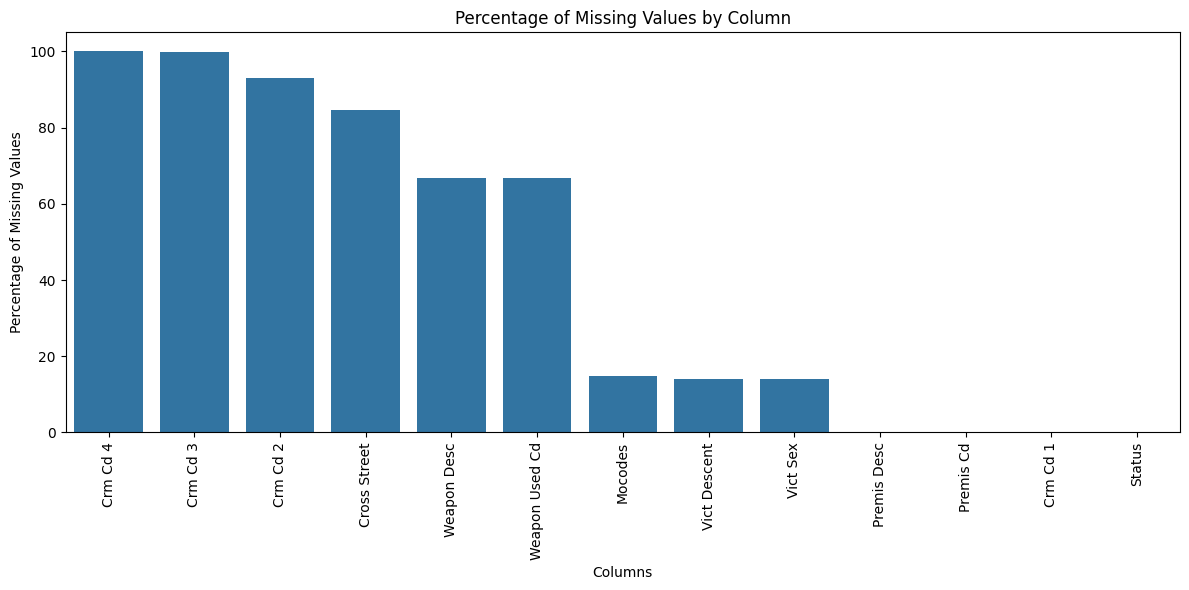

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentages.index, y=missing_percentages.values)
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
print("Missing values analysis:")
print(missing_percentages)
important_columns = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 'Vict Age']
df_cleaned = df.dropna(subset=important_columns)

df_cleaned['Vict Sex'].fillna('Unknown', inplace=True)
df_cleaned['Vict Descent'].fillna('Unknown', inplace=True)
df_cleaned['Premis Cd'].fillna(df_cleaned['Premis Cd'].mode()[0], inplace=True)
df_cleaned['Premis Desc'].fillna('Unknown', inplace=True)
df_cleaned['Weapon Used Cd'].fillna(0, inplace=True)
df_cleaned['Weapon Desc'].fillna('None', inplace=True)
df_cleaned['Cross Street'].fillna('Unknown', inplace=True)

columns_of_interest = ['DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc']
df_subset = df_cleaned[columns_of_interest]

Missing values analysis:
Crm Cd 4          99.993487
Crm Cd 3          99.764817
Crm Cd 2          92.990806
Cross Street      84.546802
Weapon Desc       66.807003
Weapon Used Cd    66.807003
Mocodes           14.782860
Vict Descent      14.090235
Vict Sex          14.089115
Premis Desc        0.059534
Premis Cd          0.001425
Crm Cd 1           0.001119
Status             0.000102
dtype: float64


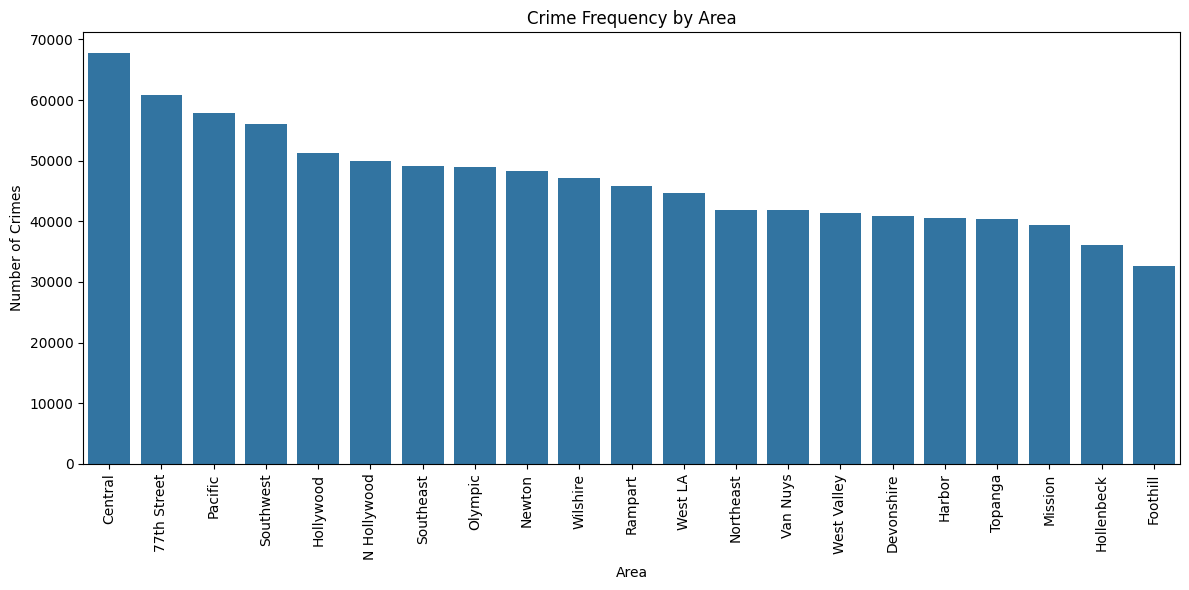

In [12]:
crime_by_area = df_subset['AREA NAME'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_by_area.index, y=crime_by_area.values)
plt.title('Crime Frequency by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
df_cleaned['DATE OCC'] = pd.to_datetime(df_cleaned['DATE OCC'])

df_cleaned['Year'] = df_cleaned['DATE OCC'].dt.year
df_cleaned['Month'] = df_cleaned['DATE OCC'].dt.month
df_cleaned['Day'] = df_cleaned['DATE OCC'].dt.day

# Daily crime trend
daily_crime = df_cleaned.groupby('DATE OCC').size().reset_index(name='Count')

# Monthly crime trend
monthly_crime = df_cleaned.groupby(['Year', 'Month']).size().reset_index(name='Count')
monthly_crime['Date'] = pd.to_datetime(monthly_crime[['Year', 'Month']].assign(DAY=1))

# Yearly crime trend
yearly_crime = df_cleaned.groupby('Year').size().reset_index(name='Count')

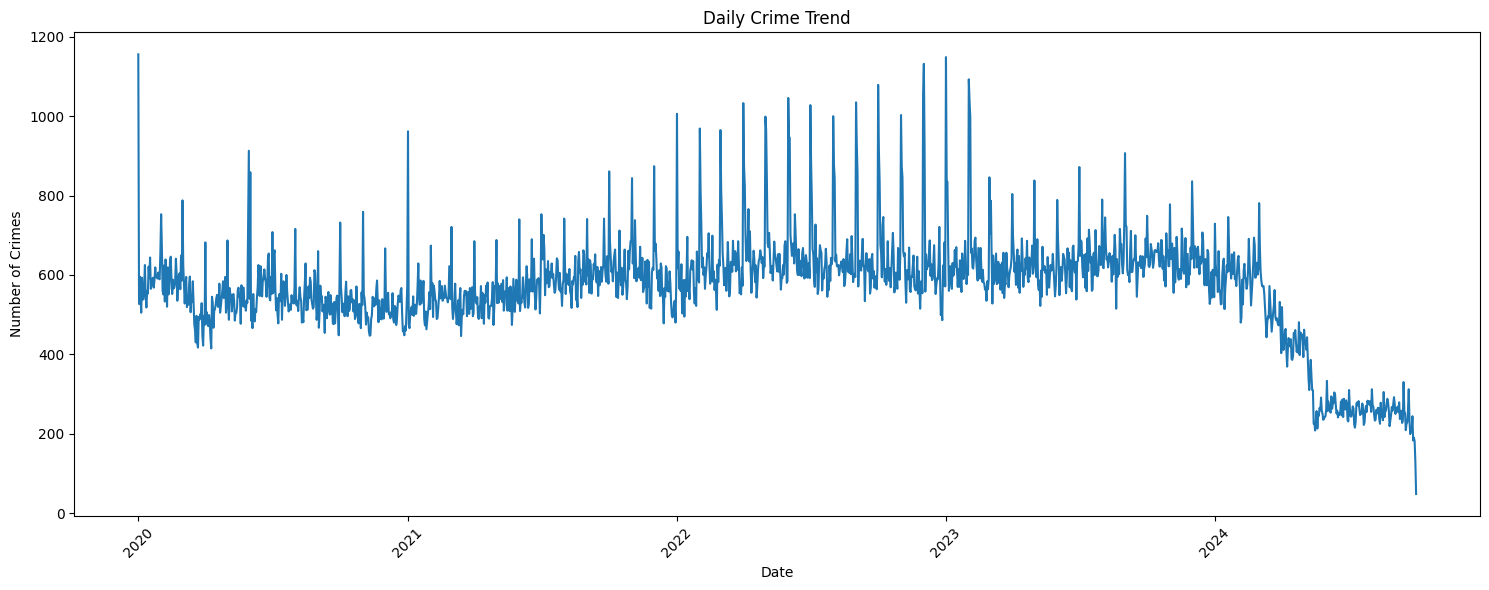

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(daily_crime['DATE OCC'], daily_crime['Count'])
plt.title('Daily Crime Trend')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

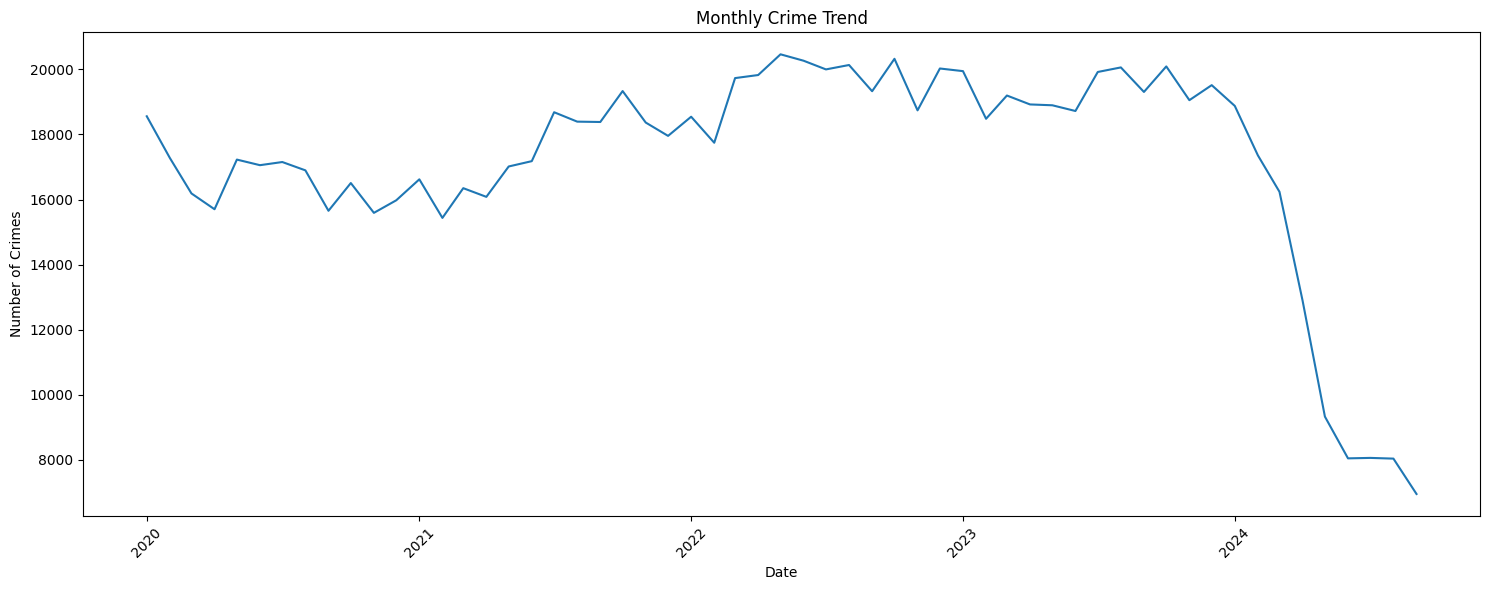

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(monthly_crime['Date'], monthly_crime['Count'])
plt.title('Monthly Crime Trend')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

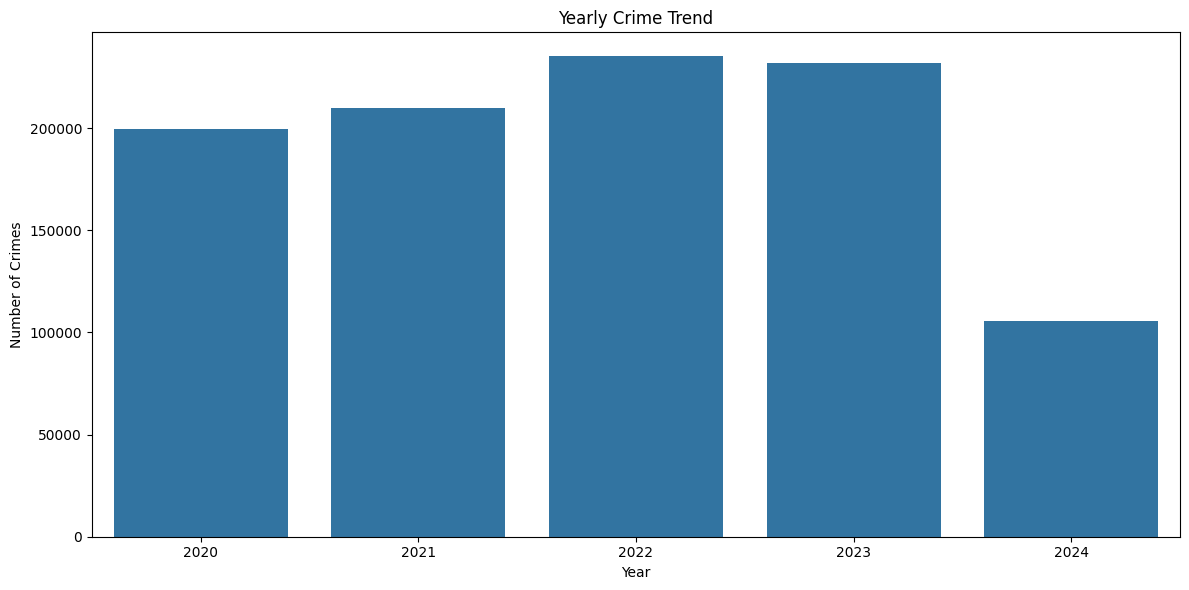

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', data=yearly_crime)
plt.title('Yearly Crime Trend')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

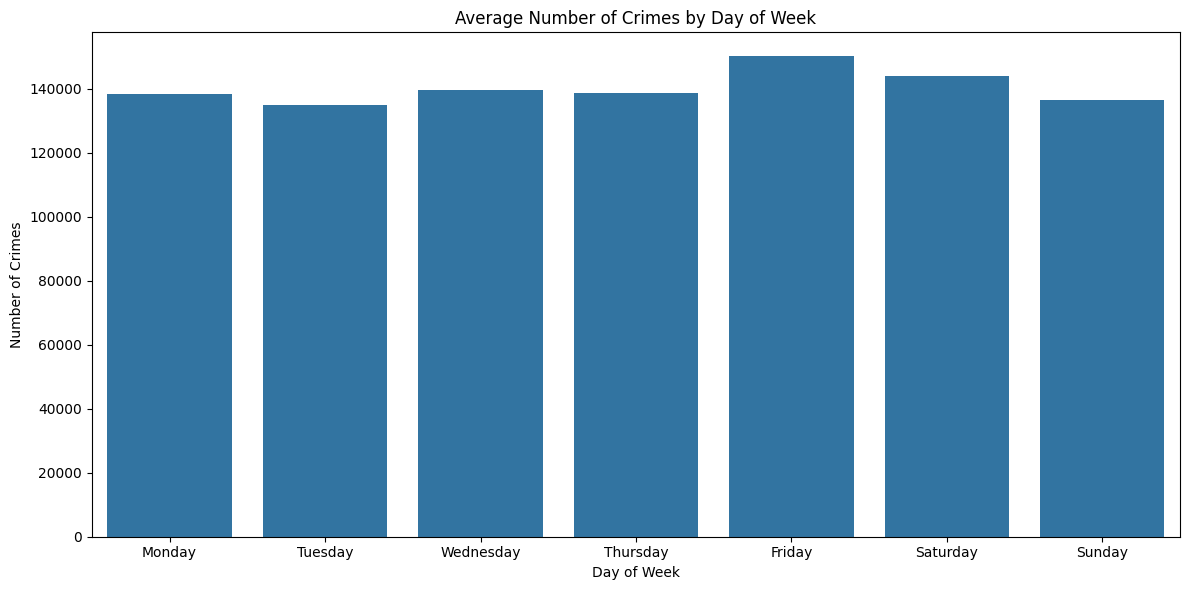

In [17]:
df_cleaned['DayOfWeek'] = df_cleaned['DATE OCC'].dt.dayofweek
crimes_by_day = df_cleaned.groupby('DayOfWeek').size().reset_index(name='Count')
crimes_by_day['DayName'] = crimes_by_day['DayOfWeek'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

plt.figure(figsize=(12, 6))
sns.barplot(x='DayName', y='Count', data=crimes_by_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Number of Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

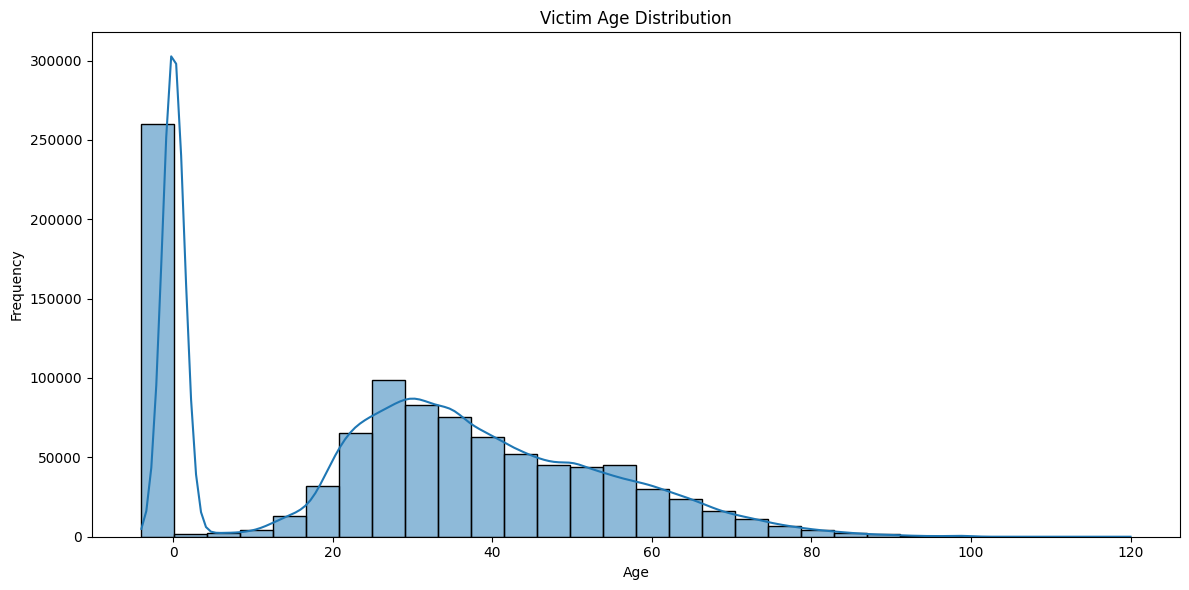

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Vict Age'], bins=30, kde=True)
plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

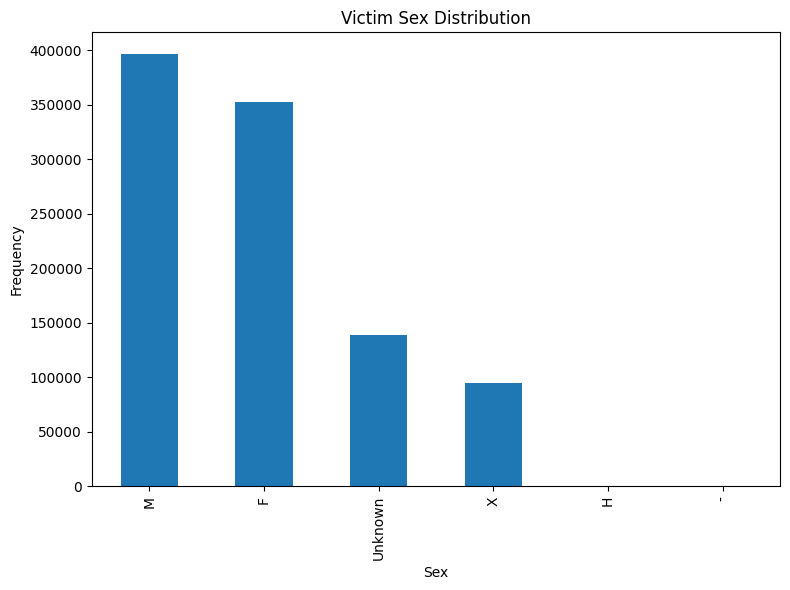

In [19]:
victim_sex_counts = df_cleaned['Vict Sex'].value_counts()
plt.figure(figsize=(8, 6))
victim_sex_counts.plot(kind='bar')
plt.title('Victim Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

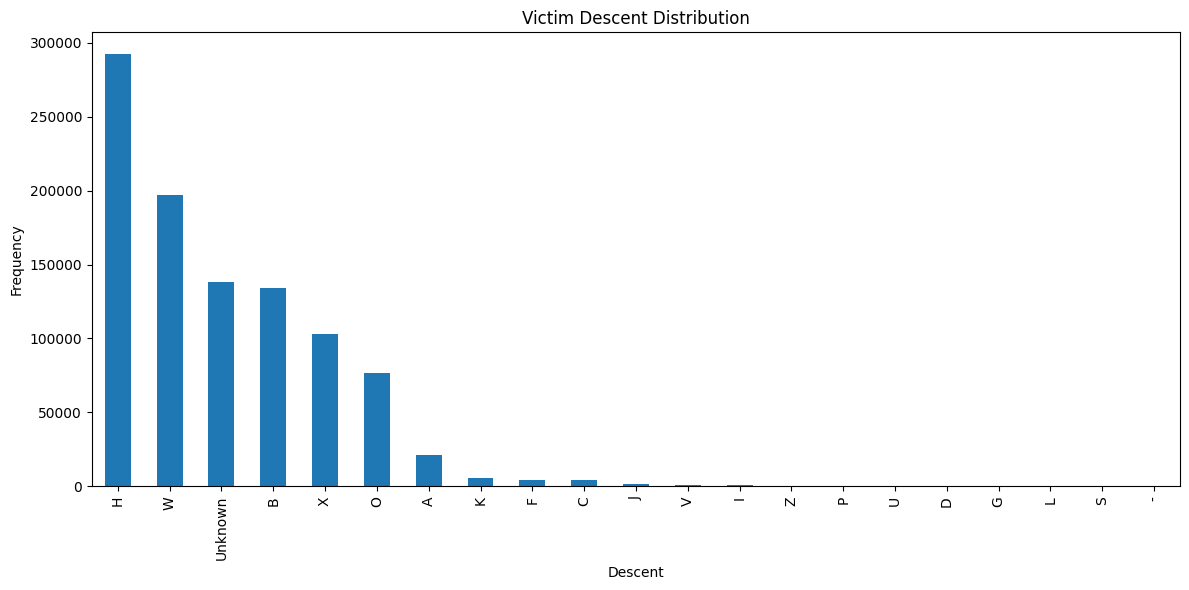

In [20]:
victim_descent_counts = df_cleaned['Vict Descent'].value_counts()
plt.figure(figsize=(12, 6))
victim_descent_counts.plot(kind='bar')
plt.title('Victim Descent Distribution')
plt.xlabel('Descent')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

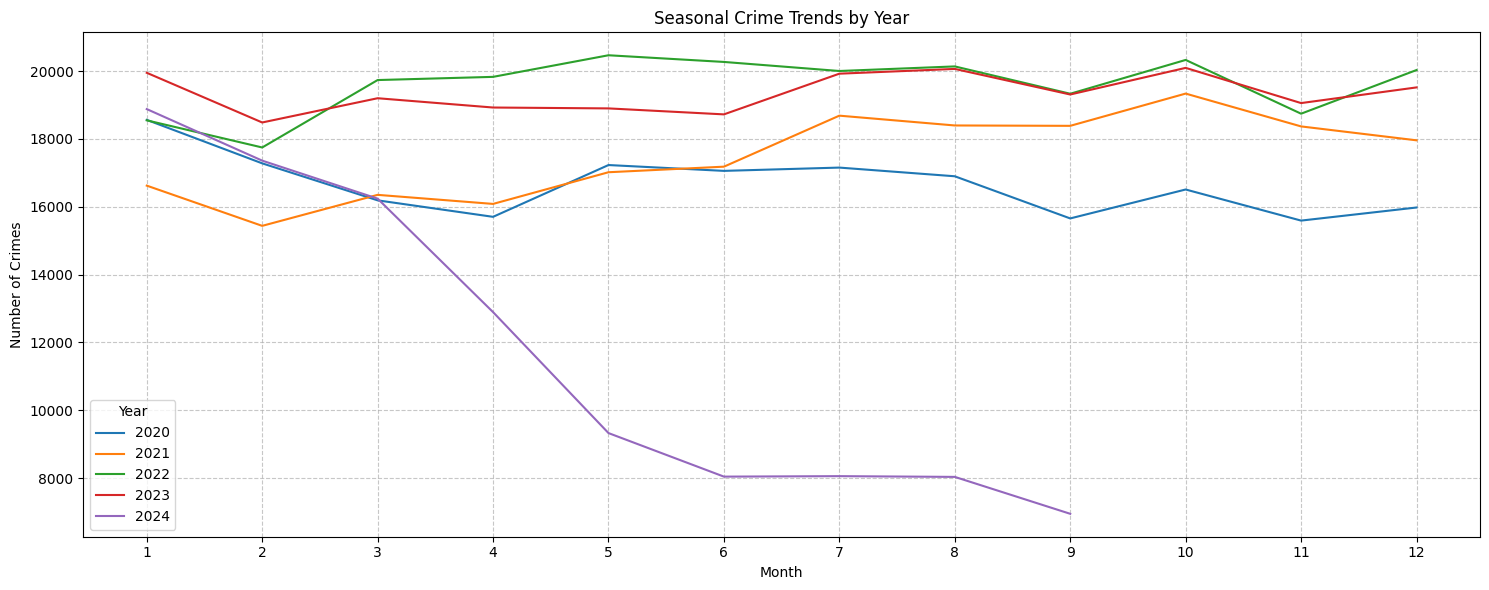

In [21]:
crime_by_month = df_cleaned.groupby(['Year', 'Month']).size().reset_index(name='Count')

crime_by_month['Date'] = pd.to_datetime(crime_by_month[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(15, 6))
for year in crime_by_month['Year'].unique():
    year_data = crime_by_month[crime_by_month['Year'] == year]
    plt.plot(year_data['Month'], year_data['Count'], label=str(year))

plt.title('Seasonal Crime Trends by Year')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Year')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
avg_crime_by_month = crime_by_month.groupby('Month')['Count'].mean().reset_index()
avg_crime_by_month = avg_crime_by_month.sort_values('Count', ascending=False)
avg_crime_by_month

,Month,Count
9,10,19065.50
0,1,18510.60
11,12,18369.75
10,11,17938.50
2,3,17541.00
1,2,17260.00
6,7,16763.00
7,8,16704.60
3,4,16685.40
4,5,16586.40


In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

crime_by_month.set_index('Date', inplace=True)
result = adfuller(crime_by_month['Count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the data is not stationary, difference the data
if result[1] > 0.05:
    crime_by_month['Count_diff'] = crime_by_month['Count'].diff().dropna()
    print('Data differenced to achieve stationarity.')
else:
    crime_by_month['Count_diff'] = crime_by_month['Count']

# ARIMA model
arima_model = ARIMA(crime_by_month['Count_diff'].dropna(), order=(1, 0, 1))
arima_result = arima_model.fit()
print('ARIMA model fitted.')

# SARIMA model
sarima_model = SARIMAX(crime_by_month['Count_diff'].dropna(), order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print('SARIMA model fitted.')

# SARIMAX model
sarimax_model = SARIMAX(crime_by_month['Count_diff'].dropna(), order=(1, 0, 1), seasonal_order=(1, 1, 1, 12), exog=None)
sarimax_result = sarimax_model.fit()
print('SARIMAX model fitted.')

# Evaluate models using mean squared error
arima_mse = mean_squared_error(crime_by_month['Count_diff'].dropna(), arima_result.fittedvalues)
sarima_mse = mean_squared_error(crime_by_month['Count_diff'].dropna(), sarima_result.fittedvalues)
sarimax_mse = mean_squared_error(crime_by_month['Count_diff'].dropna(), sarimax_result.fittedvalues)

print('ARIMA MSE:', arima_mse)
print('SARIMA MSE:', sarima_mse)
print('SARIMAX MSE:', sarimax_mse)

ADF Statistic: -1.0290056783384673
p-value: 0.7425387124598319
Data differenced to achieve stationarity.
ARIMA model fitted.


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-package

SARIMA model fitted.


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX model fitted.
ARIMA MSE: 1061157.6156186943
SARIMA MSE: 836762.2119611733
SARIMAX MSE: 836762.2119611733


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-package

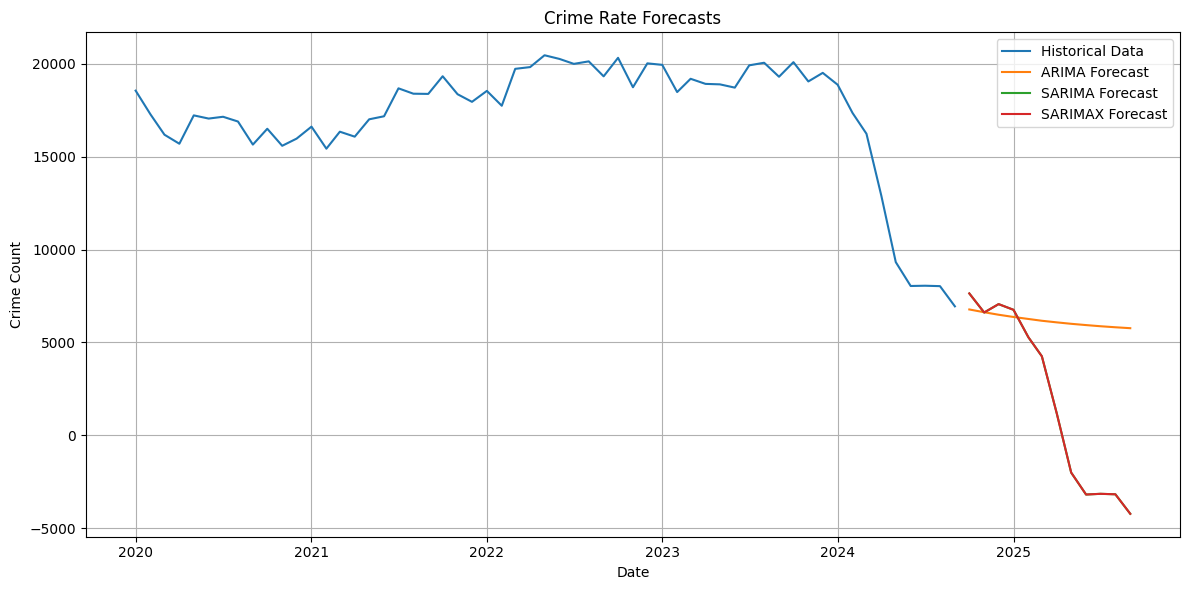

                  ARIMA       SARIMA      SARIMAX
2024-10-01  6777.453097  7640.305900  7640.305900
2024-11-01  6627.431243  6614.350643  6614.350643
2024-12-01  6493.101355  7064.925419  7064.925419
2025-01-01  6372.822086  6758.723997  6758.723997
2025-02-01  6265.123773  5279.378071  5279.378071
2025-03-01  6168.690473  4256.066419  4256.066419
2025-04-01  6082.343891  1182.853484  1182.853484
2025-05-01  6005.028977 -2004.502513 -2004.502513
2025-06-01  5935.801038 -3187.998591 -3187.998591
2025-07-01  5873.814194 -3149.844779 -3149.844779
2025-08-01  5818.311042 -3175.184199 -3175.184199
2025-09-01  5768.613401 -4225.471900 -4225.471900
Average forecasted monthly crime rate: 3341.55


In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

crime_by_month.index = pd.to_datetime(crime_by_month.index)
lags = 12

# ARIMA Forecast
arima_model = ARIMA(crime_by_month['Count'], order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=lags)

# SARIMA Forecast
sarima_model = SARIMAX(crime_by_month['Count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=lags)

sarimax_model = SARIMAX(crime_by_month['Count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()
sarimax_forecast = sarimax_result.forecast(steps=lags)

forecast_index = pd.date_range(start=crime_by_month.index[-1] + pd.DateOffset(months=1), periods=lags, freq='MS')
forecast_df = pd.DataFrame({
    'ARIMA': arima_forecast,
    'SARIMA': sarima_forecast,
    'SARIMAX': sarimax_forecast
}, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(crime_by_month.index, crime_by_month['Count'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['ARIMA'], label='ARIMA Forecast')
plt.plot(forecast_df.index, forecast_df['SARIMA'], label='SARIMA Forecast')
plt.plot(forecast_df.index, forecast_df['SARIMAX'], label='SARIMAX Forecast')
plt.title('Crime Rate Forecasts')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(forecast_df)

average_forecast = forecast_df.mean().mean()
print(f"Average forecasted monthly crime rate: {average_forecast:.2f}")

<Figure size 1200x1000 with 0 Axes>

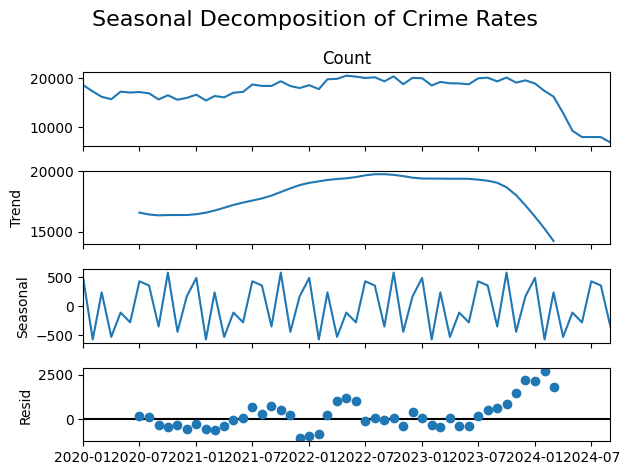

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(crime_by_month['Count'], model='additive', period=12)

plt.figure(figsize=(12, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Crime Rates', fontsize=16)
plt.tight_layout()
plt.show()

13:21:08 - cmdstanpy - INFO - Chain [1] start processing
13:21:09 - cmdstanpy - INFO - Chain [1] done processing


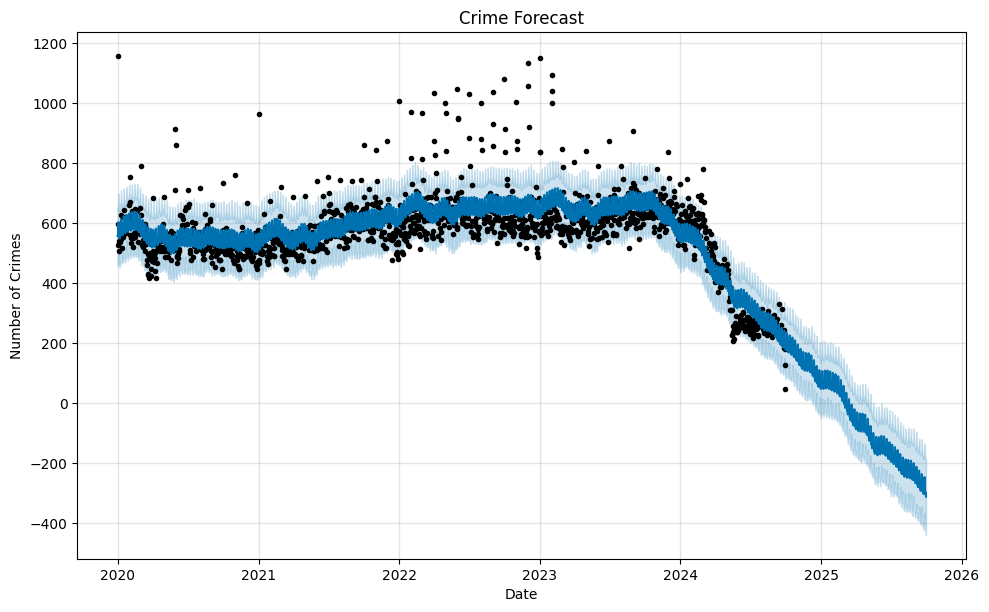

In [26]:
from prophet import Prophet
df_prophet = df_cleaned.groupby('DATE OCC').size().reset_index(name='y')
df_prophet = df_prophet.rename(columns={'DATE OCC': 'ds'})

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(df_prophet)

future_dates = model.make_future_dataframe(periods=365)

forecast = model.predict(future_dates)

fig1 = model.plot(forecast)
plt.title('Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

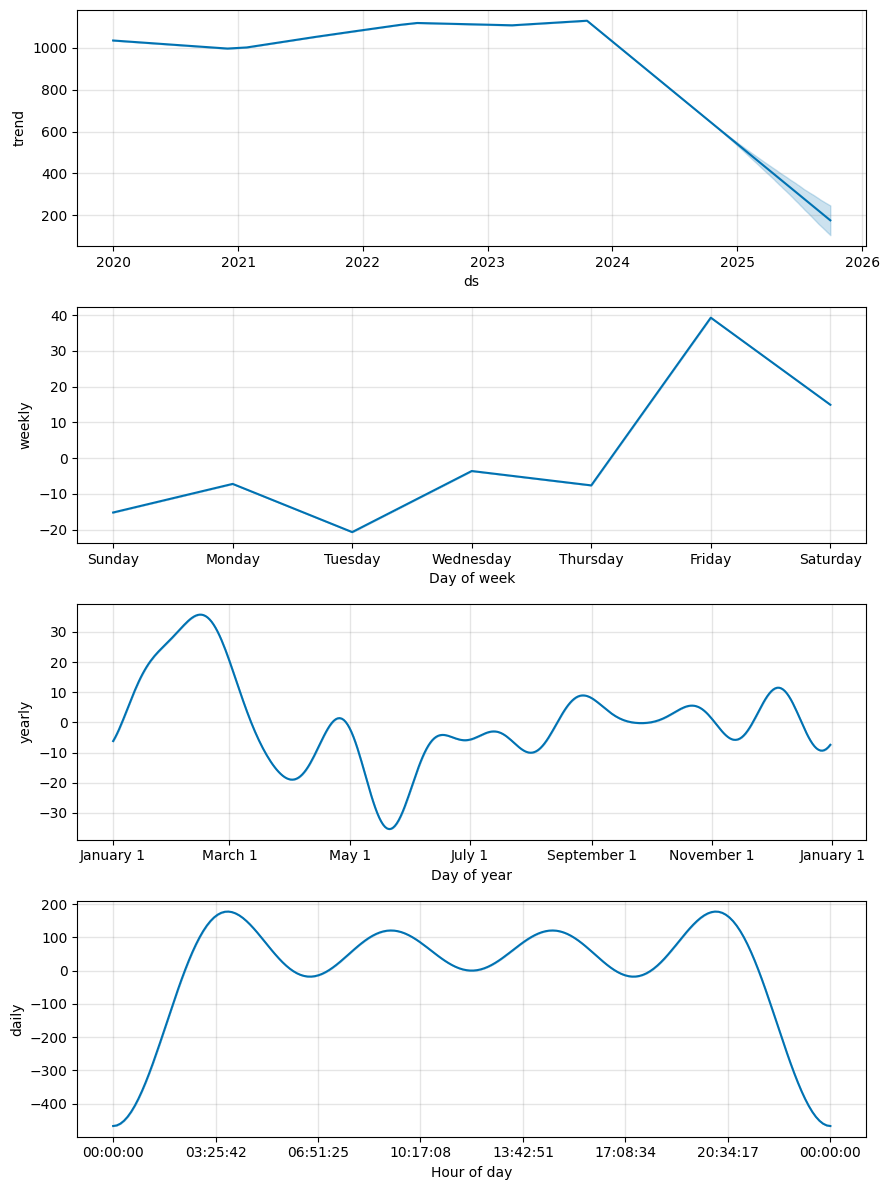

Forecast summary for the next 30 days:
             ds        yhat  yhat_lower  yhat_upper
2070 2025-09-01 -251.341671 -373.775017 -139.723137
2071 2025-09-02 -266.568854 -381.752323 -157.825757
2072 2025-09-03 -251.305324 -363.066689 -141.551871
2073 2025-09-04 -257.165113 -375.826229 -144.232968
2074 2025-09-05 -212.169646 -335.128326  -95.564475
2075 2025-09-06 -238.381905 -356.016046 -123.925535
2076 2025-09-07 -270.381292 -382.840844 -161.997694
2077 2025-09-08 -264.270640 -385.053507 -157.630045
2078 2025-09-09 -279.610156 -393.916204 -166.448848
2079 2025-09-10 -264.388268 -380.082147 -143.792662
2080 2025-09-11 -270.225097 -387.188373 -157.177283
2081 2025-09-12 -225.149229 -344.666068 -118.491471
2082 2025-09-13 -251.231574 -366.739146 -127.428056
2083 2025-09-14 -283.059927 -396.092908 -171.135567
2084 2025-09-15 -276.745672 -394.874294 -162.245624
2085 2025-09-16 -291.857427 -403.361353 -170.508765
2086 2025-09-17 -276.391628 -395.969008 -167.528927
2087 2025-09-18 -281.9757

In [27]:
fig2 = model.plot_components(forecast)
plt.show()

print("Forecast summary for the next 30 days:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

In [28]:
trend_start = forecast['trend'].iloc[0]
trend_end = forecast['trend'].iloc[-1]
trend_change = ((trend_end - trend_start) / trend_start) * 100

print(f"\
Overall trend change: {trend_change:.2f}%")

Overall trend change: -83.00%


In [29]:
yearly_seasonality = forecast['yearly'].max() - forecast['yearly'].min()
weekly_seasonality = forecast['weekly'].max() - forecast['weekly'].min()
daily_seasonality = forecast['daily'].max() - forecast['daily'].min()

print(f"\
Seasonality ranges:")
print(f"Yearly: {yearly_seasonality:.2f}")
print(f"Weekly: {weekly_seasonality:.2f}")
print(f"Daily: {daily_seasonality:.2f}")

Seasonality ranges:
Yearly: 71.10
Weekly: 59.92
Daily: 0.00


Data shape: (1735, 2)
Data types:
ds    datetime64[ns]
y              int64
dtype: object
First few rows:
          ds     y
0 2020-01-01  1156
1 2020-01-02   527
2 2020-01-03   596
3 2020-01-04   541
4 2020-01-05   505
Last few rows:
             ds    y
1730 2024-09-26  183
1731 2024-09-27  190
1732 2024-09-28  181
1733 2024-09-29  128
1734 2024-09-30   48
Missing values:
ds    0
y     0
dtype: int64


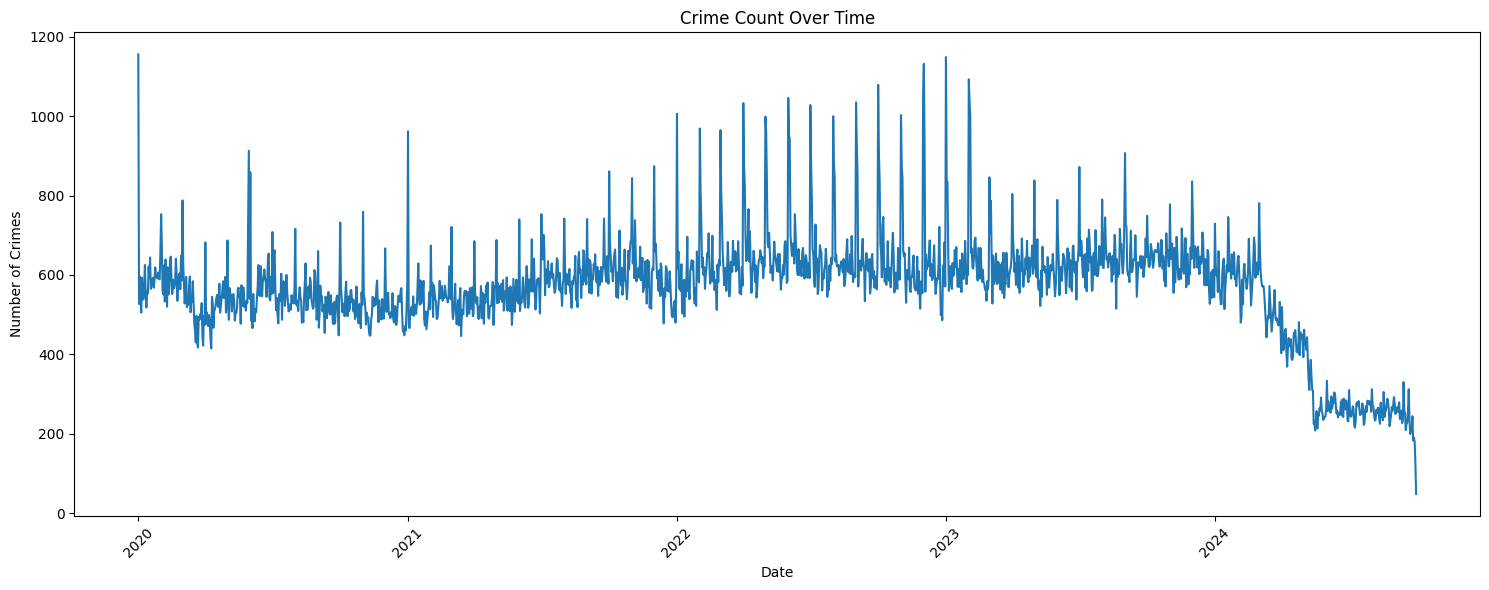

In [30]:
df_prophet = df_cleaned.groupby('DATE OCC').size().reset_index(name='y')
df_prophet = df_prophet.rename(columns={'DATE OCC': 'ds'})

print("Data shape:", df_prophet.shape)
print("\
Data types:")
print(df_prophet.dtypes)
print("\
First few rows:")
print(df_prophet.head())
print("\
Last few rows:")
print(df_prophet.tail())

print("\
Missing values:")
print(df_prophet.isnull().sum())

plt.figure(figsize=(15, 6))
plt.plot(df_prophet['ds'], df_prophet['y'])
plt.title('Crime Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
print("\
Summary statistics:")
print(df_prophet['y'].describe())

Summary statistics:
count    1735.000000
mean      566.361960
std       128.619663
min        48.000000
25%       525.000000
50%       582.000000
75%       628.000000
max      1156.000000
Name: y, dtype: float64


In [32]:
print("\
Date range:")
print("Start date:", df_prophet['ds'].min())
print("End date:", df_prophet['ds'].max())

date_range = pd.date_range(start=df_prophet['ds'].min(), end=df_prophet['ds'].max())
missing_dates = date_range.difference(df_prophet['ds'])
print("\
Number of missing dates:", len(missing_dates))
if len(missing_dates) > 0:
    print("Sample of missing dates:")
    print(missing_dates[:5])

Date range:
Start date: 2020-01-01 00:00:00
End date: 2024-09-30 00:00:00
Number of missing dates: 0


13:21:10 - cmdstanpy - INFO - Chain [1] start processing
13:21:10 - cmdstanpy - INFO - Chain [1] done processing


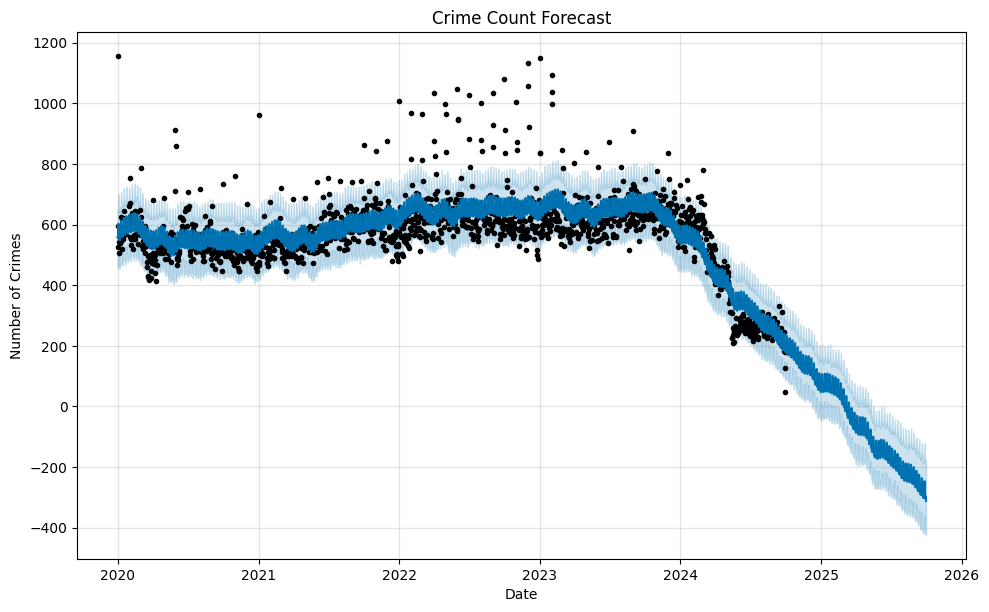

In [33]:
from datetime import datetime
current_date = datetime.now().date()
df_prophet = df_prophet[df_prophet['ds'].dt.date <= current_date]

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Crime Count Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

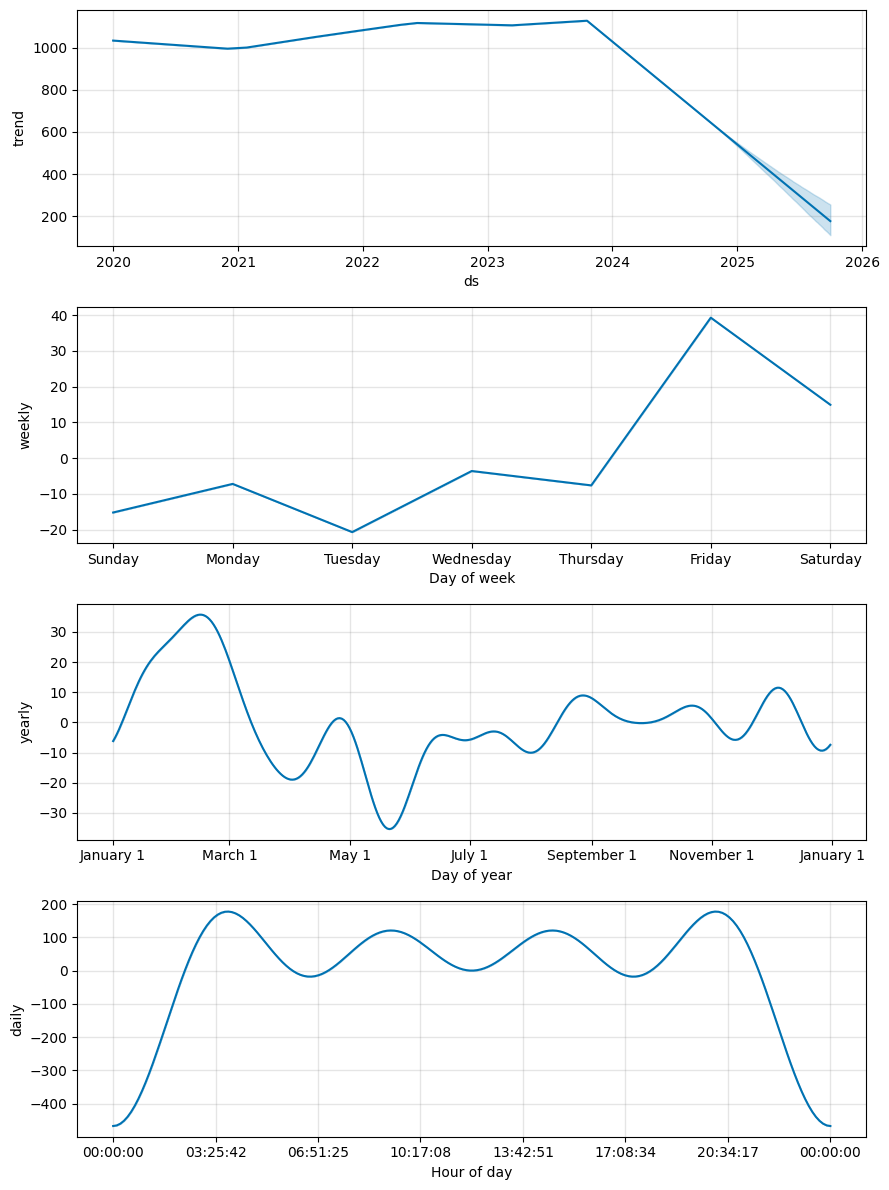

In [34]:
fig2 = model.plot_components(forecast)
plt.show()

In [35]:
print("Forecast Summary:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Forecast Summary:
             ds        yhat  yhat_lower  yhat_upper
2095 2025-09-26 -246.606380 -362.920373 -121.255321
2096 2025-09-27 -272.264837 -396.225258 -160.965888
2097 2025-09-28 -303.684340 -420.165712 -181.975302
2098 2025-09-29 -296.976529 -412.966935 -175.855230
2099 2025-09-30 -311.708954 -423.473691 -191.942963


13:21:12 - cmdstanpy - INFO - Chain [1] start processing
13:21:12 - cmdstanpy - INFO - Chain [1] done processing


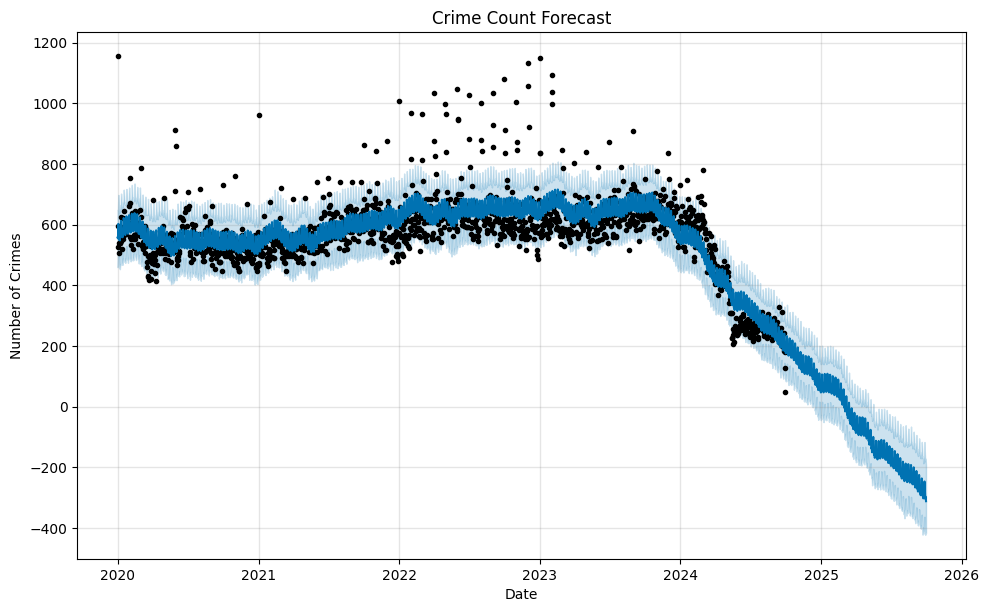

In [36]:
current_date = datetime.now().date()
df_prophet = df_prophet[df_prophet['ds'].dt.date <= current_date]

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Crime Count Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

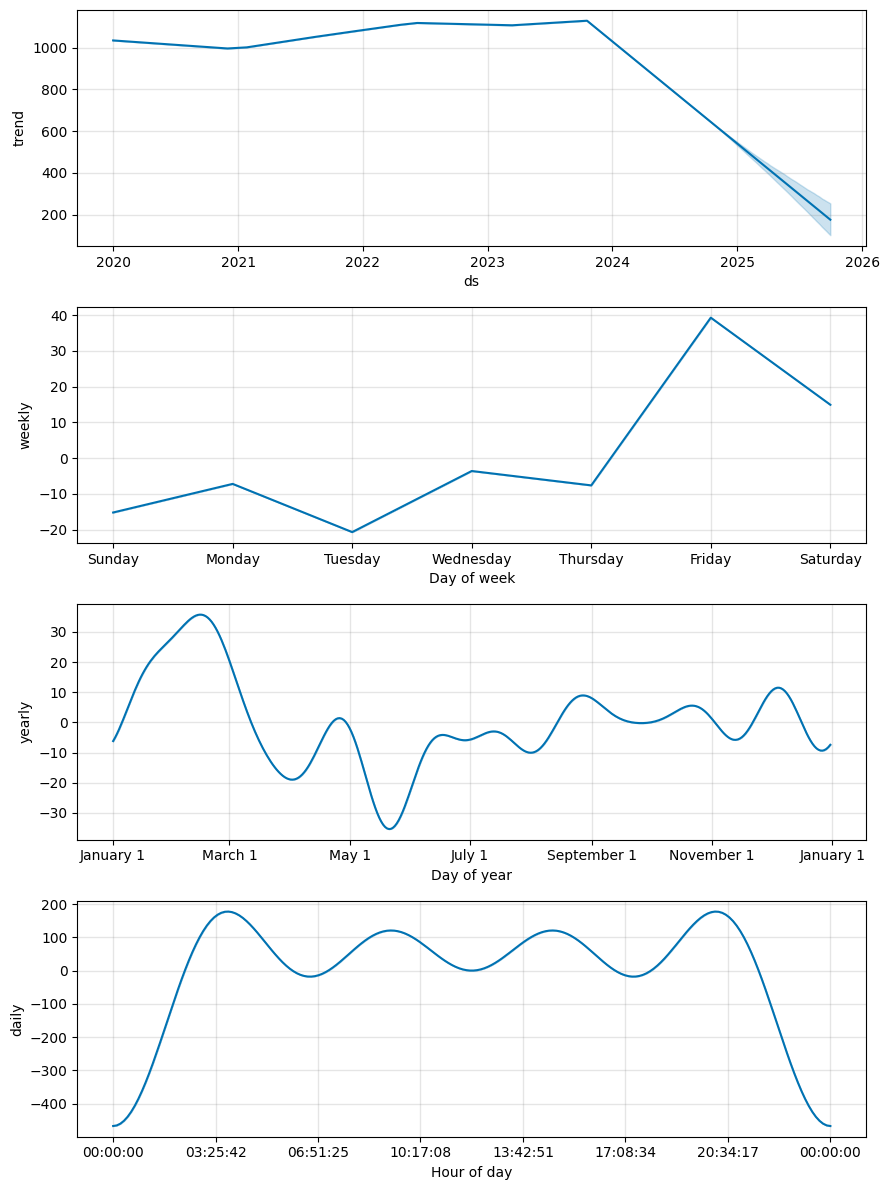

In [37]:
fig2 = model.plot_components(forecast)
plt.show()

In [38]:
print("Forecast Summary:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Forecast Summary:
             ds        yhat  yhat_lower  yhat_upper
2095 2025-09-26 -246.606380 -362.916164 -116.722388
2096 2025-09-27 -272.264837 -399.132407 -152.662617
2097 2025-09-28 -303.684340 -422.374652 -180.247478
2098 2025-09-29 -296.976529 -415.224697 -171.738734
2099 2025-09-30 -311.708954 -417.013907 -191.814923


In [39]:
import folium
from folium.plugins import HeatMap

df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')
df = df.dropna(subset=['LAT', 'LON'])

map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

heat_data = [[row['LAT'], row['LON']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map)

map.save('crime_heatmap.html')

In [40]:
print("\
Number of crime incidents plotted:", len(df))

Number of crime incidents plotted: 982638


In [41]:
print("\
Top 5 areas with highest crime counts:")
print(df['AREA NAME'].value_counts().head())

Top 5 areas with highest crime counts:
AREA NAME
Central        67774
77th Street    60865
Pacific        57810
Southwest      55978
Hollywood      51324
Name: count, dtype: int64
